In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

def getXY(csv, features=None, do_print=True):
    df = csv.copy()
    y_ori = np.array(df['type'])
    y_ori[y_ori == 0] = 0
    y_ori[y_ori == 2] = 1
    y_ori
    if(type(features) == type(None)):
        head = list(df.keys())
        head.remove('Unnamed: 0')
        head.remove('name')
        head.remove('score')
        head.remove('type')
        X_ori = np.array(df[head])
    else:
        X_ori = np.array(df[features])
    if(do_print):
        print(f"{X_ori.shape=} {y_ori.shape=}")
    return X_ori, y_ori

In [12]:
rank = [ 7, 20, 32, 26, 25,  9, 56, 36, 14, 11,  6, 10, 18,  3, 15]
# features = np.array(['Fp1_Delta','F3_Delta','F4_Delta','C3_Delta','P4_Delta','F3_Theta','C3_Theta','T4_Theta','P4_Theta','F3_Alpha','F4_Alpha','F7_Alpha','T6_Alpha','P4_Alpha','F3_Beta','F3_Gamma','T3_Gamma','F3_Slow','F3_Low_beta','T4_Low_beta','C3_relative_gamma','alpha_frontal','alpha_temporal','alpha_asymmetry','beta_frontal'])

csv = pd.read_csv('export/15s_133features_filter_std_pca133.csv')
X_pca133, _ = getXY(csv)
csv = pd.read_csv('export/15s_133features_filter_std.csv')
X_ori, _ = getXY(csv)
head = list(csv.keys())
head.remove('Unnamed: 0')
head.remove('name')
head.remove('score')
head.remove('type')


X_ori.shape=(720, 133) y_ori.shape=(720,)
X_ori.shape=(720, 133) y_ori.shape=(720,)


In [3]:
X_pca_selected = X_pca133[:,[ 7, 20, 32, 26, 25,  9, 56, 36, 14, 11,  6, 10, 18,  3, 15]]

In [4]:
X_pca_selected.shape

(720, 15)

In [8]:
pca_list = []
for i in rank:
    # print(i)
    pca_list.append(f"pca_{i}")



In [15]:
df_pca8 = pd.DataFrame(np.concatenate([X_ori,X_pca_selected],axis=1), columns=list(head)+pca_list)
corrMatrix = df_pca8.corr()

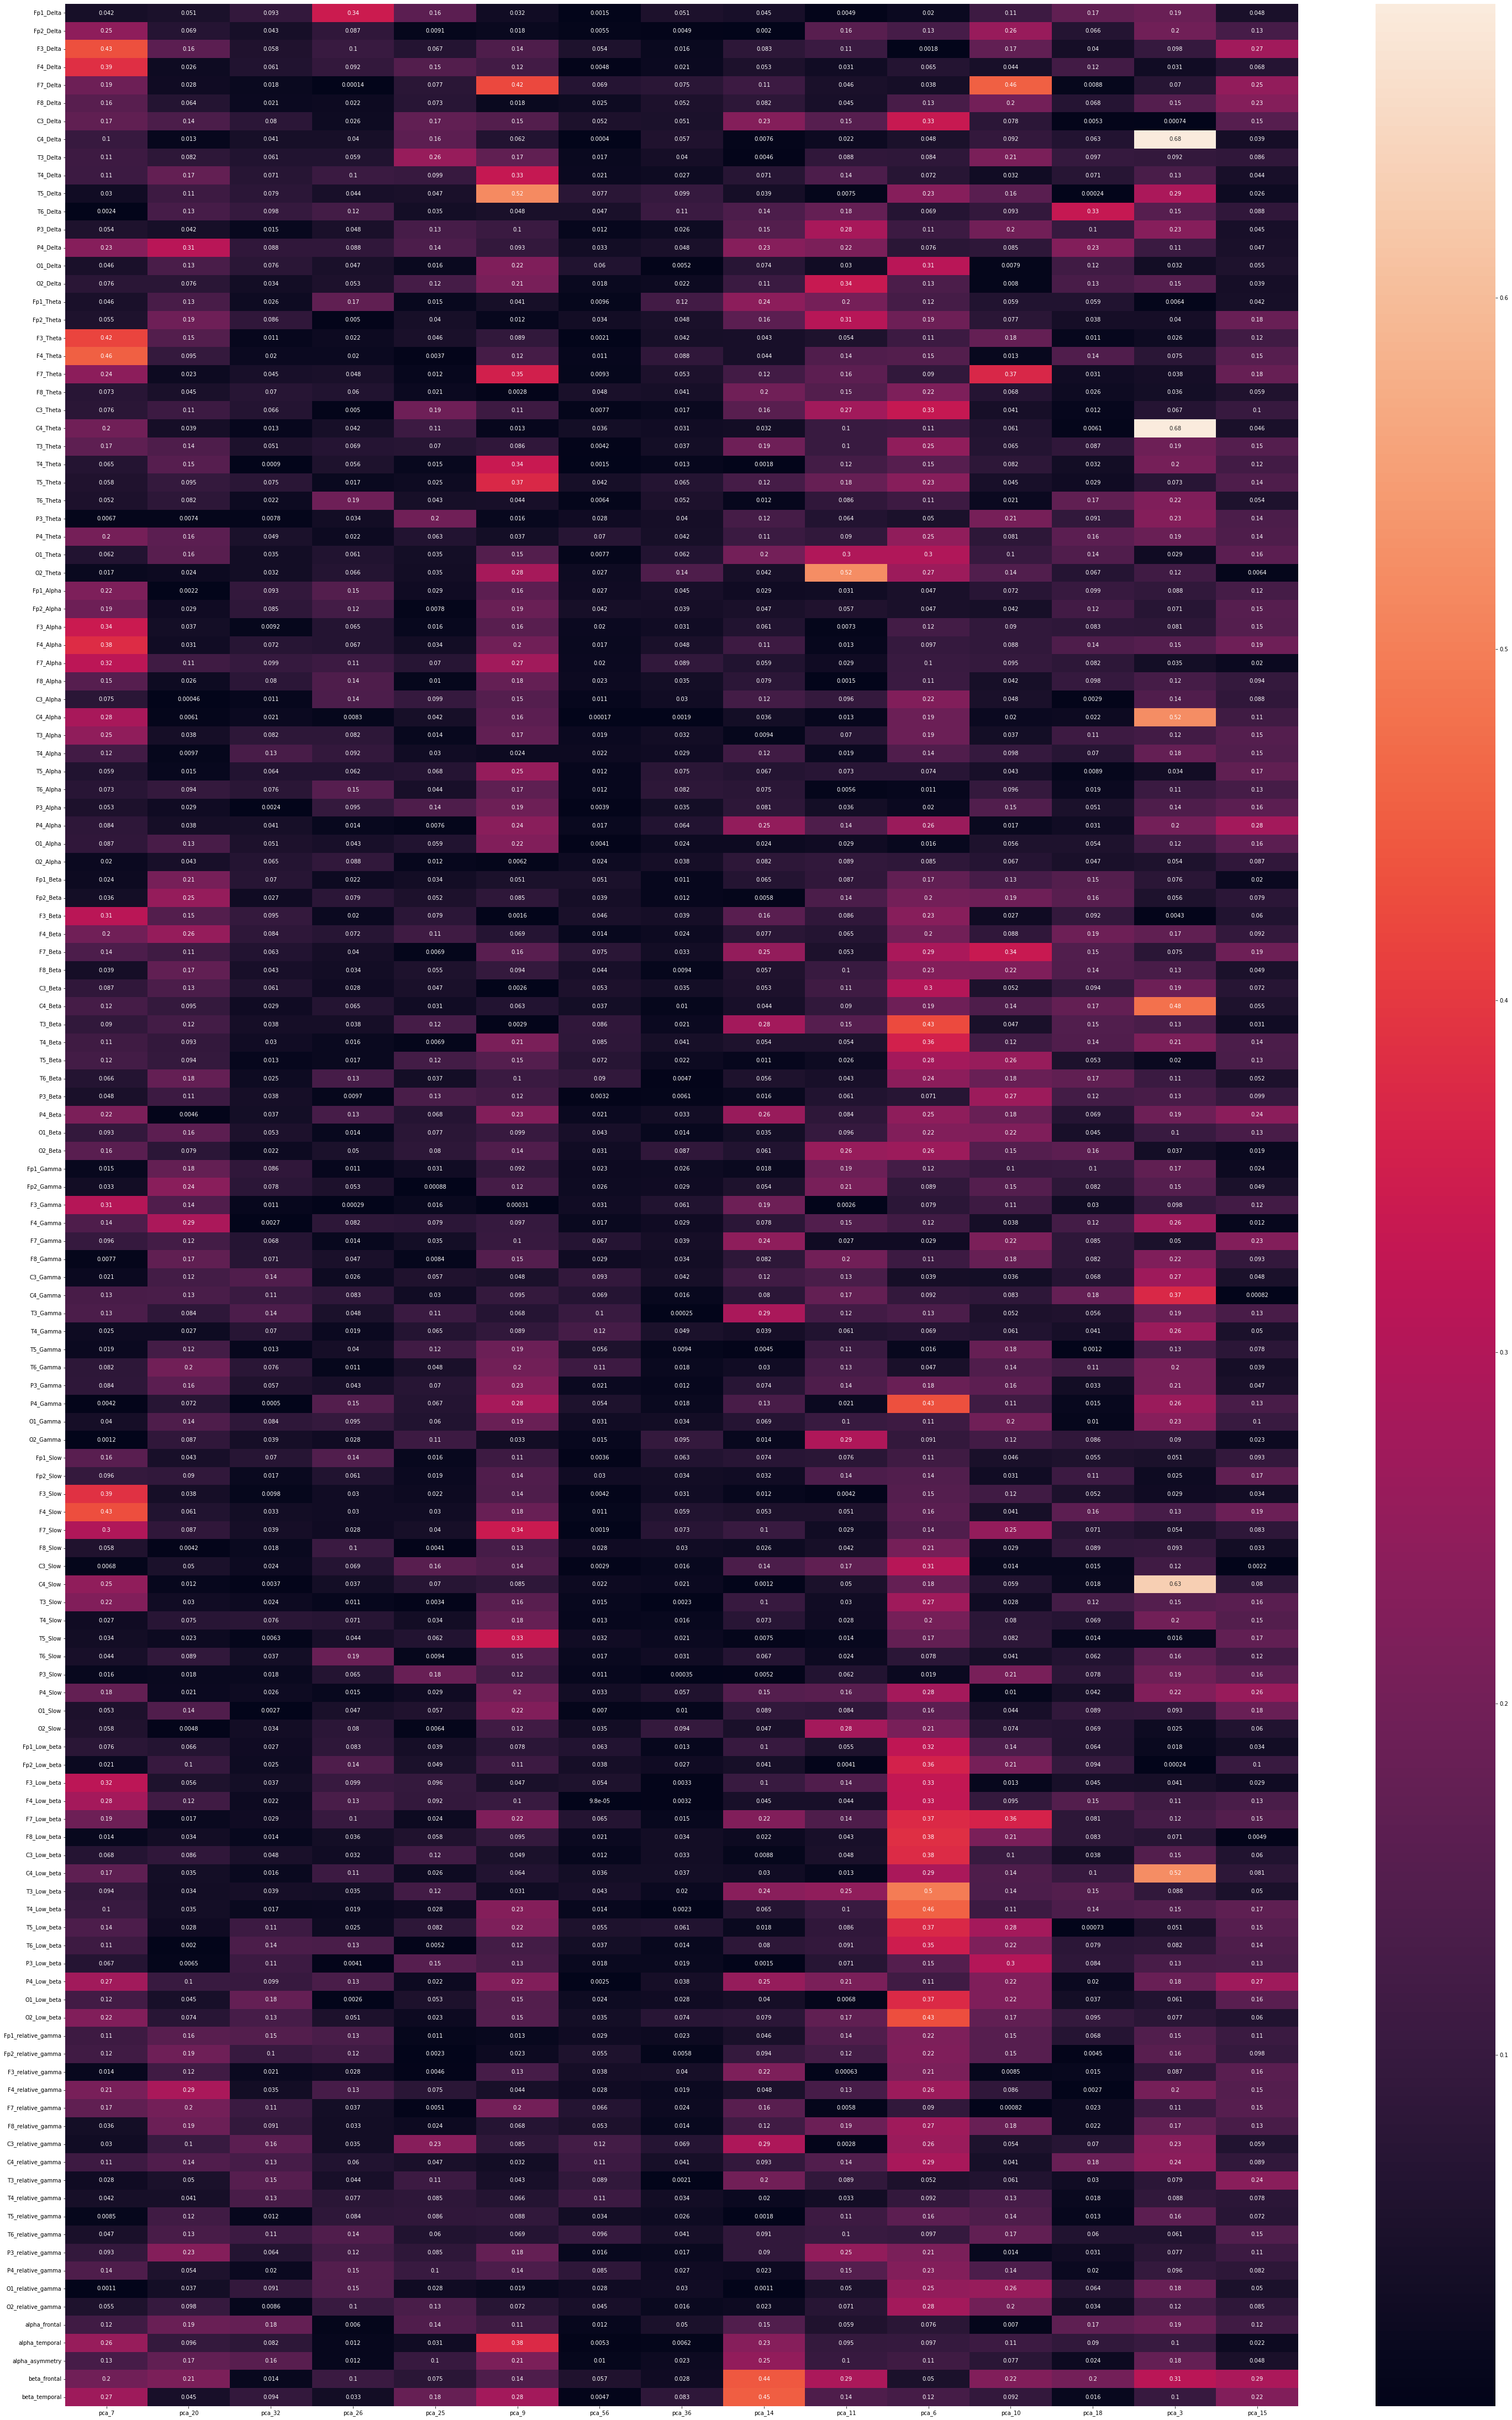

In [19]:
plt.rcParams["figure.figsize"] = (50,80)
sn.heatmap(abs(corrMatrix.iloc[  list(range(0,len(head))), list(range(len(head),len(head)+15))    ]), annot=True)
plt.show()